# **Pra UAS**

# **Wine Dataset**

Data ini merupakan hasil analisis kimia anggur yang ditanam di wilayah yang sama di Italia tetapi berasal dari tiga kultivar yang berbeda. Analisis tersebut menentukan kuantitas 13 konstituen yang ditemukan di masing-masing dari tiga jenis anggur. Saya pikir kumpulan data awal memiliki sekitar 30 variabel, tetapi untuk beberapa alasan saya hanya memiliki versi 13 dimensi. Saya memiliki daftar berisi sekitar 30 variabel, tetapi a.) Saya kehilangannya, dan b.), Saya tidak tahu 13 variabel mana yang termasuk dalam kumpulan tersebut. Atributnya adalah (disumbangkan oleh Riccardo Leardi, riclea@anchem.unige.it)
- 1) Alkohol
-2) Asam malat
-3) Abu
-4) Alkalinitas abu
-5) Magnesium
-6) Total fenol
-7) Flavonoid
-8) Fenol nonflavonoid
-9) Proantosianidin
-10) Intensitas warna
-11) Rona
-12) OD280/OD315 anggur encer
-13) Prolin

Dalam konteks klasifikasi, ini adalah masalah yang tepat dengan struktur kelas yang "berperilaku baik".
Kumpulan data yang baik untuk pengujian pertama pengklasifikasi baru, tetapi tidak terlalu menantang.

In [1]:
! pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

## **Menampilkan Data**

In [3]:
import pandas as pd
df_wine = pd.concat([X, y], axis=1)
df_wine


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## **Data Understanding**

### **Sumber Data**
Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/109/wine

### **Cek Missing Value**

In [4]:
# Menampilkan jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df_wine.isnull().sum())

# Menampilkan total missing value di seluruh dataset
total_missing = df_wine.isnull().sum().sum()
print(f"\nTotal missing value di seluruh dataset: {total_missing}")


Jumlah missing value per kolom:
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

Total missing value di seluruh dataset: 0


### **Cek Ukuran Dataset**

In [5]:
print(f"Ukuran dataset: {df_wine.shape}")  # (baris, kolom)

Ukuran dataset: (178, 14)


### **Cek Nilai Unik diKolom Target**

In [6]:
print("Distribusi nilai target:")
print(df_wine.iloc[:, -1].value_counts())  # Asumsikan kolom target ada di kolom terakhir

Distribusi nilai target:
class
2    71
1    59
3    48
Name: count, dtype: int64


### **Distribusi Dan Korelasi Fitur**

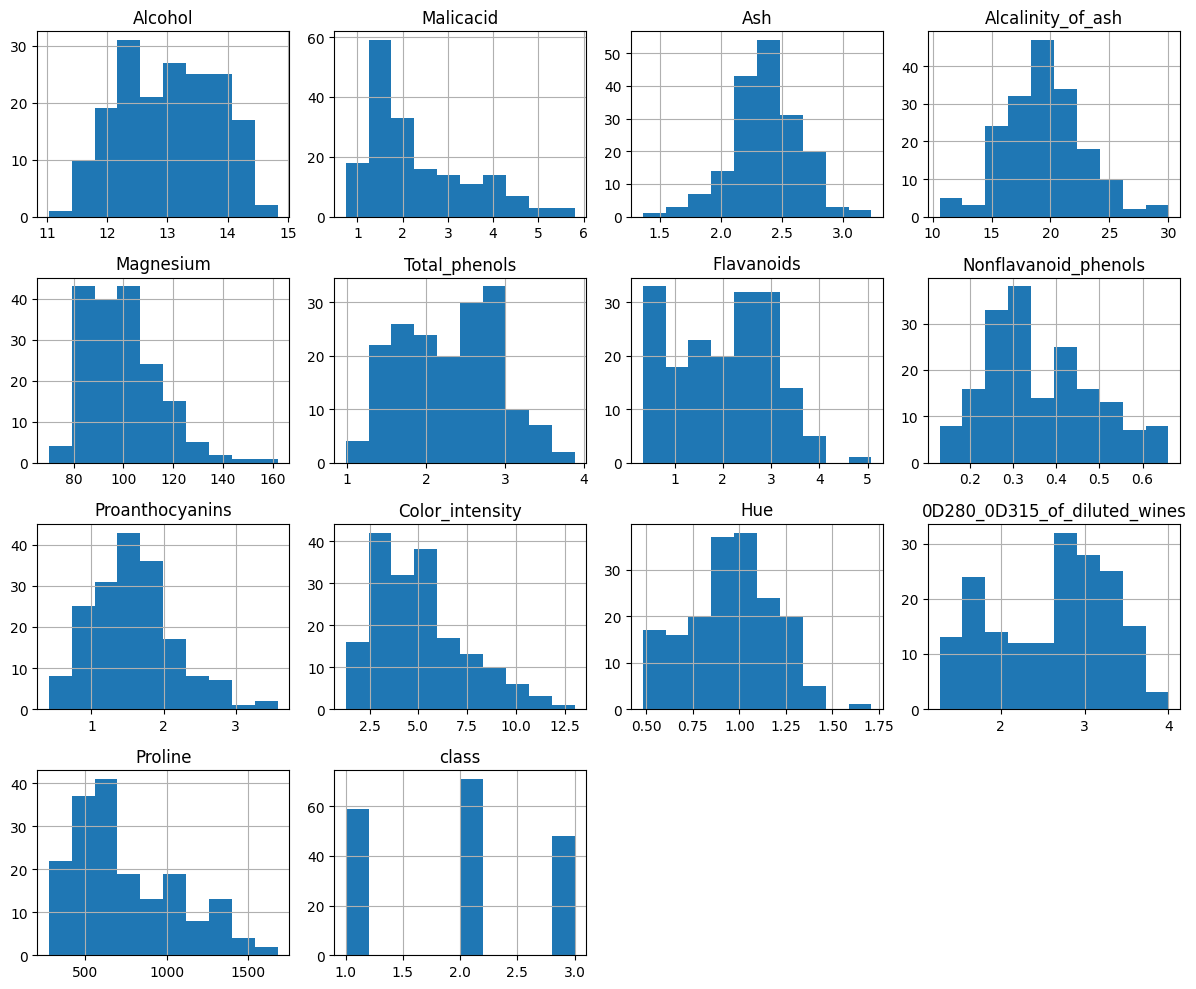

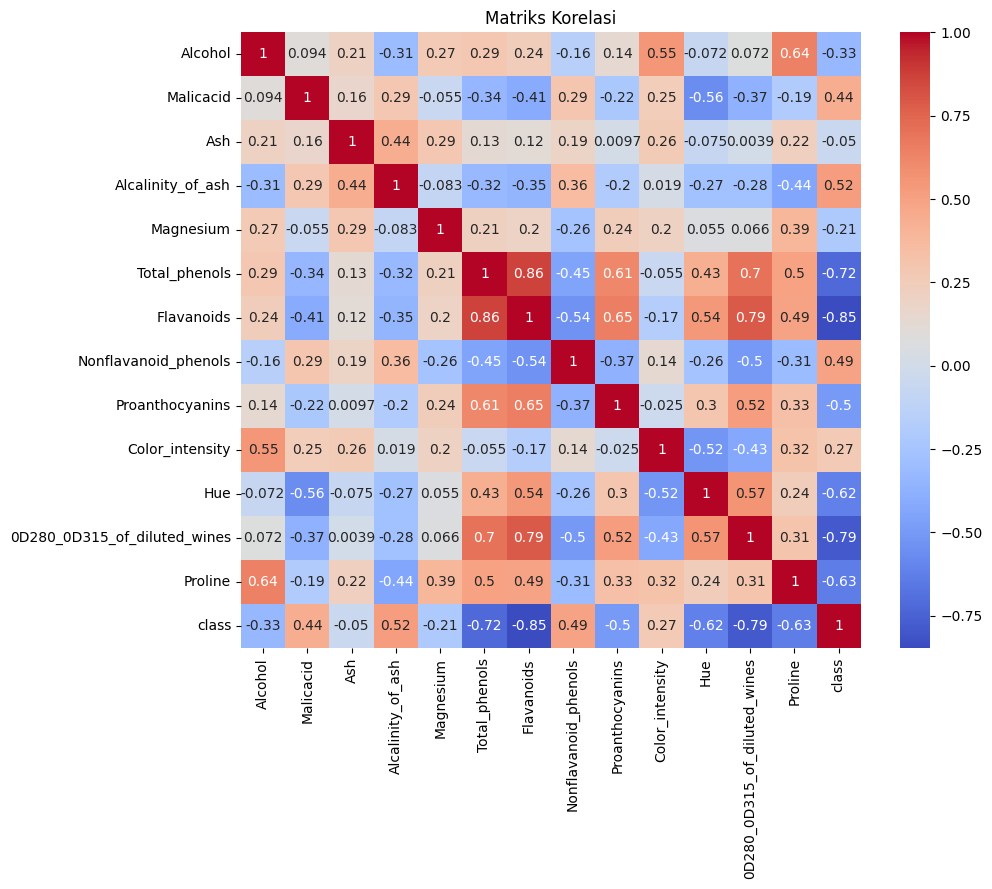

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
df_wine.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()
print()
print()
# Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_wine.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

### **Cek Data Imbalance**

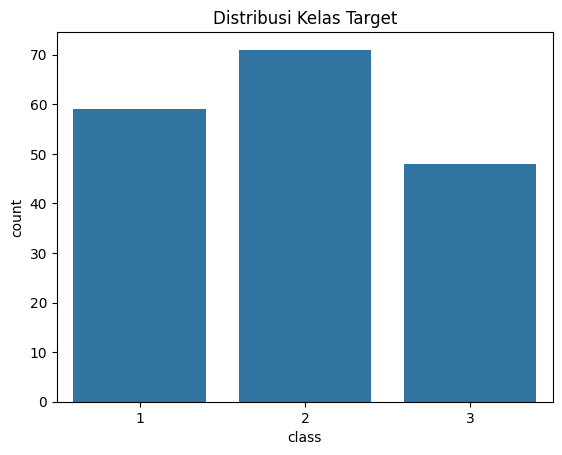

In [8]:
sns.countplot(x=df_wine.iloc[:, -1])
plt.title("Distribusi Kelas Target")
plt.show()

## **Pre Processing data**

### **Normalisasi data**

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)
# Gabungkan dengan target
df_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

# Tampilkan hasil
df_normalized


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


### **Deteksi Outlier**

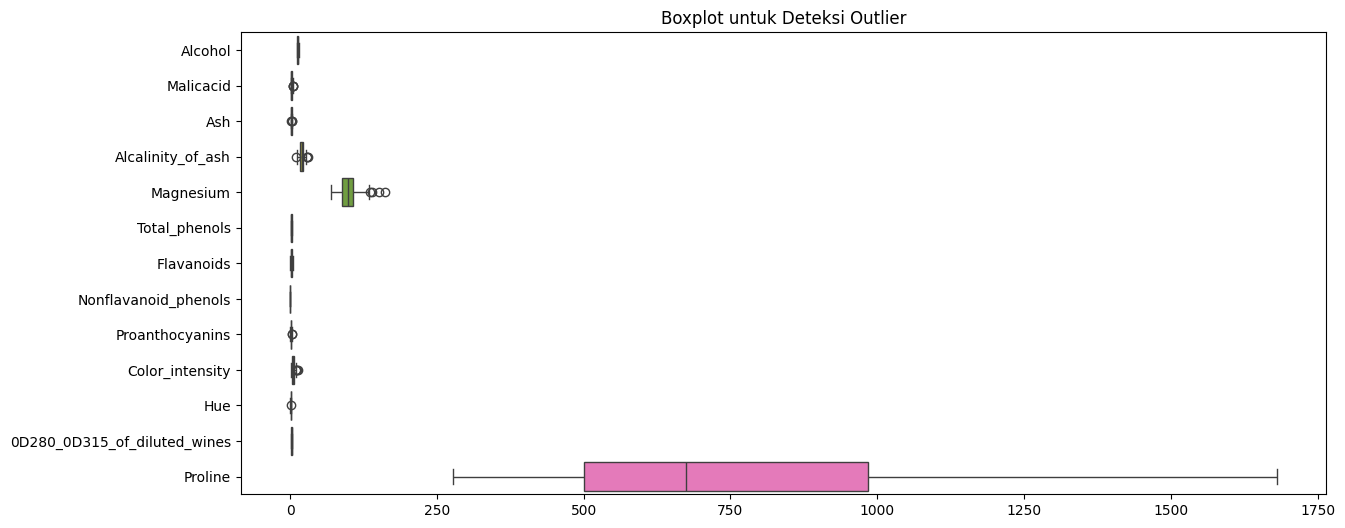

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=X, orient="h")
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()


In [11]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ambil data Wine
wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)


## **Modeling menggunakan K-NN**

KNN adalah algoritma non-parametrik berbasis instance-based learning. Artinya, ia tidak membangun model eksplisit, tetapi menyimpan seluruh data latih dan melakukan prediksi berdasarkan kemiripan data.

⚙️ Cara Kerja:
- Tentukan nilai K (misalnya 3 atau 5).

- Hitung jarak (umumnya Euclidean) antara data uji dengan seluruh data latih.

- Ambil K data latih terdekat.

- Klasifikasi berdasarkan mayoritas kelas dari tetangga

In [12]:
import numpy as np
from collections import Counter

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(np.array(x_test), X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = distances[:k]
    labels = [label for _, label in k_neighbors]
    return Counter(labels).most_common(1)[0][0]

# Prediksi semua data uji
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().ravel()

y_pred_knn_manual = [knn_predict(X_train_np, y_train_np, x, k=3) for x in X_test_np]
from sklearn.metrics import accuracy_score, classification_report

print("=== KNN Manual (k=3) ===")
print("Akurasi:", accuracy_score(y_test_np, y_pred_knn_manual))
print("Classification Report:\n", classification_report(y_test_np, y_pred_knn_manual))


=== KNN Manual (k=3) ===
Akurasi: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



## **Modeling menggunakan Decision Tree**

Decision Tree adalah model berbasis pembelahan data (splitting) ke dalam struktur pohon. Setiap node memecah data berdasarkan fitur yang memberikan informasi terbaik (entropy rendah / Gini impurity rendah).

⚙️ Cara Kerja:
- Hitung impurity (contoh: entropy) dari data.

- Cek semua fitur untuk split, pilih fitur dengan information gain tertinggi.

- Bentuk cabang pohon untuk setiap kemungkinan nilai split.

- Ulangi proses untuk cabang hingga mencapai kondisi berhenti (daun pohon).

=== Decision Tree ===
Akurasi: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.88      1.00      0.93        14
           3       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



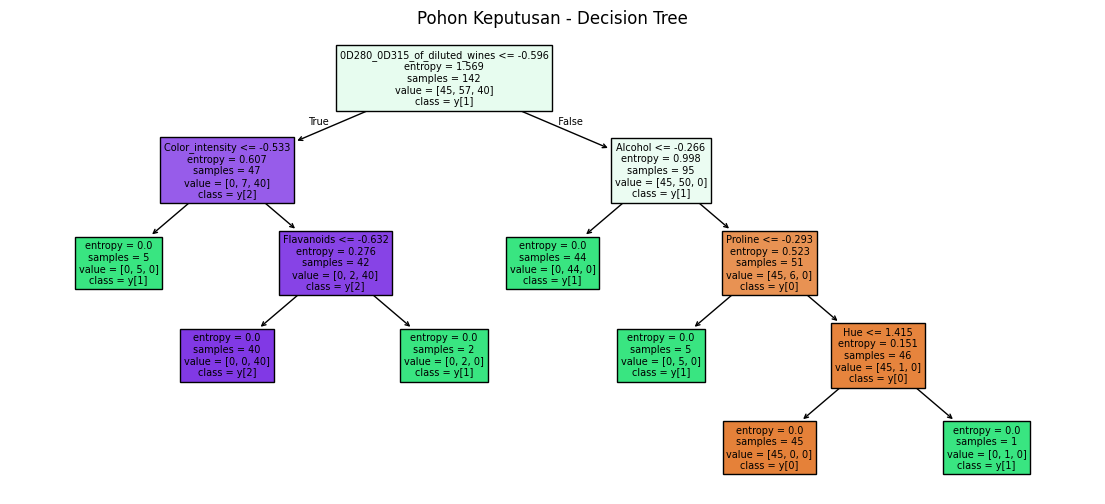

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plot_tree(tree, feature_names=X.columns, class_names=True, filled=True)
plt.title("Pohon Keputusan - Decision Tree")
plt.show()


## **Modeling menggunakan Naive Bayes**

Naive Bayes adalah metode berbasis probabilitas yang menggunakan Teorema Bayes, dengan asumsi bahwa semua fitur bersifat independen satu sama lain.

⚙️ Cara Kerja:
- Hitung frekuensi tiap kelas → 𝑃(𝐻)

- Hitung rata-rata dan variansi dari tiap fitur untuk setiap kelas.

- Hitung probabilitas tiap fitur untuk suatu data baru.

- Pilih kelas dengan probabilitas tertinggi.

- Pada data numerik, digunakan Gaussian (Normal) Distribution untuk menghitung 
$𝑃(𝑥𝑖∣𝑦)$


In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
Akurasi: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Evaluasi**
Total Akurasi tiap metode menunjukkan bahwa metode naive bayes mempunyai tingkat akurasi yang lebih tinggi

In [15]:
import pandas as pd

results = {
    'Model': ['KNN (Manual)', 'Decision Tree', 'Naive Bayes'],
    'Akurasi': [
        accuracy_score(y_test_np, y_pred_knn_manual),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_nb)
    ]
}

pd.DataFrame(results)


,Model,Akurasi
0,KNN (Manual),0.944444
1,Decision Tree,0.916667
2,Naive Bayes,1.000000
